In [295]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set_palette('Set2')
sns.set_style('whitegrid')

import matplotlib.pyplot as plt
%matplotlib inline

import requests
import json
import datetime
import time

from sklearn.preprocessing import KBinsDiscretizer

In [296]:
file = 'CSV_for_EDA.csv'

In [297]:
df = pd.read_csv(file, index_col='date', parse_dates=True)

In [298]:
def clean_up_for_eda(df):

    temp_enc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
    x = temp_enc.fit_transform(df[['apparent_temperature']])
    
    temp = pd.DataFrame(x, index=df.index)
    
    temp = temp.replace({0: 'very_cold',
                    1: 'cold',
                    2: 'warm',
                    3: 'hot',
                    4: 'very_hot'})
    
    df = df.merge(temp, on='date', how='left')
    
    df = df.rename(columns={0: 'temperature_bin'})
    
    df['outside'] = df['outside'].replace({0: 'outside_closed',
                              1: 'outside_open'})

    return df

df = clean_up_for_eda(df)

In [299]:
dfp = df

In [300]:
# Drop Closed Nights for EDA
df = df[df.closed == 0]

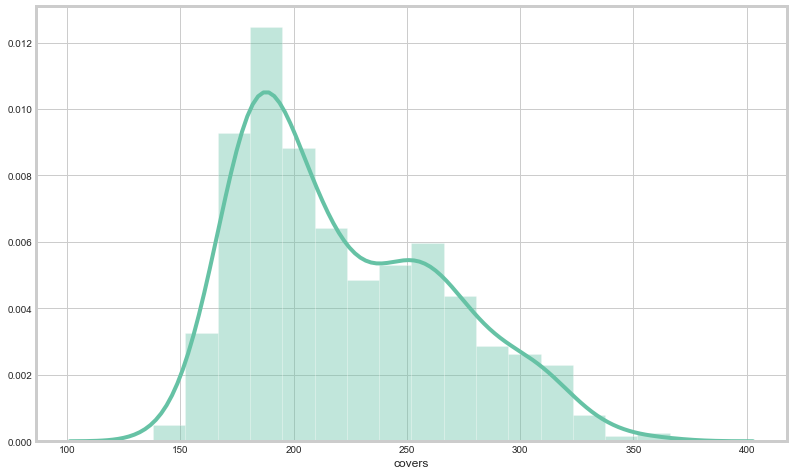

In [301]:
# Histogram of Property Value
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
sns.distplot(df['covers']);

In [302]:
df_ytd = df[df.index.month < 6] # Analyzing Months 1 through 5
dfm_total = df.resample('M').sum()
dfm_avg = df.resample('M').mean()

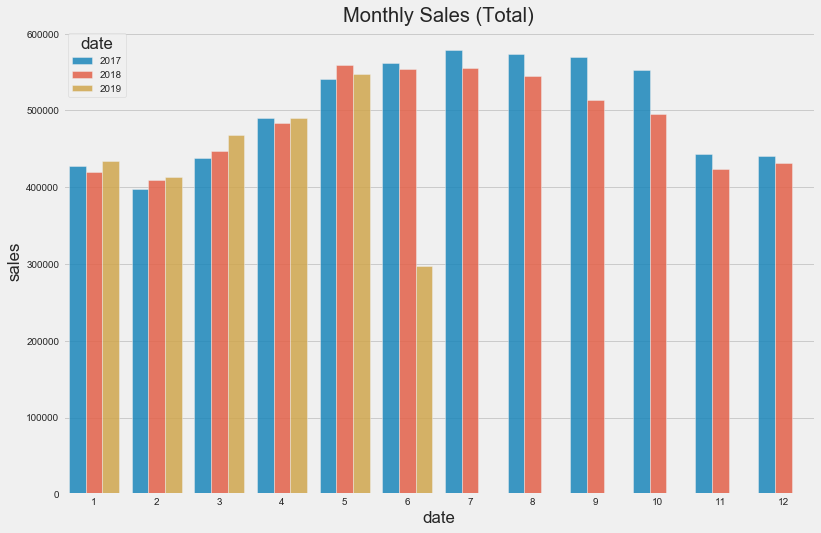

In [303]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))

sns.barplot(x=dfm_total.index.month, y='sales', hue=dfm_total.index.year, data=dfm_total, alpha=0.85, ci=False)
plt.title('Monthly Sales (Total)');

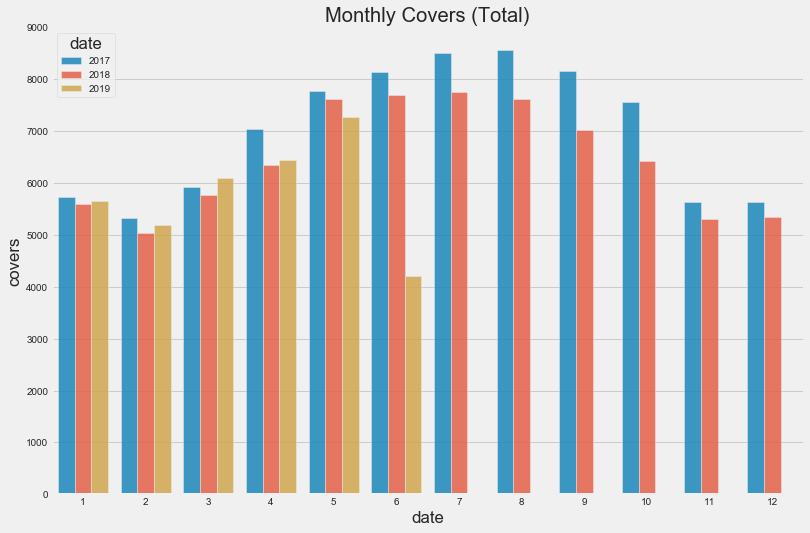

In [304]:
plt.figure(figsize=(12,8))
sns.barplot(x=dfm_total.index.month, y='covers', hue=dfm_total.index.year, data=dfm_total, alpha=0.85, ci=False)
plt.title('Monthly Covers (Total)');

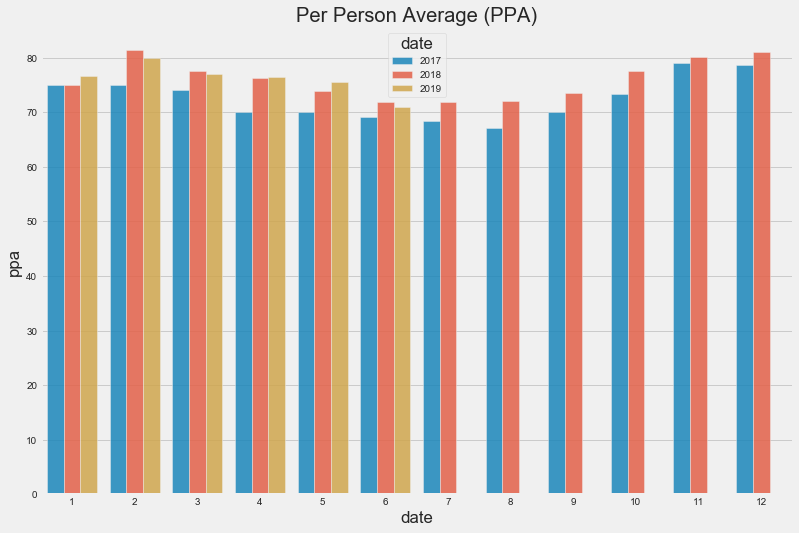

In [305]:
plt.figure(figsize=(12,8))
sns.barplot(x=dfm_avg.index.month, y='ppa', hue=dfm_avg.index.year, data=dfm_avg, alpha=0.85, ci=False)
plt.title('Per Person Average (PPA)');

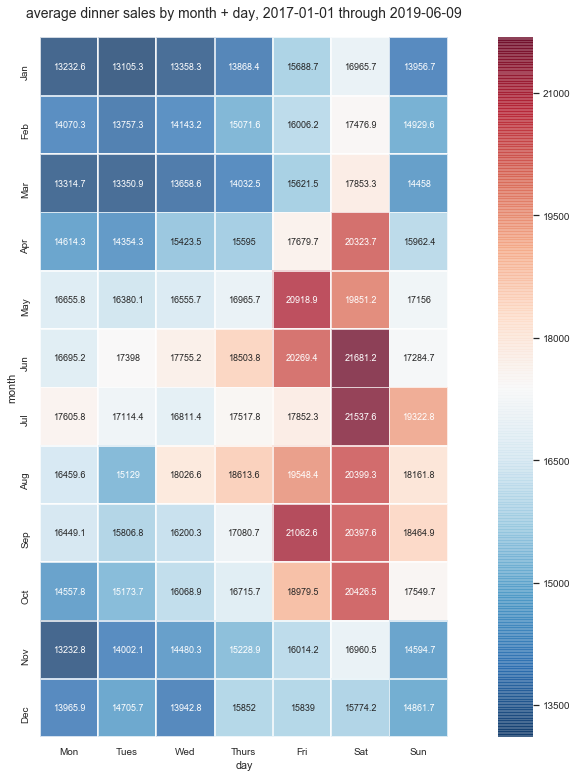

In [306]:
def sales_heatmap(df, start_date, end_date):
    
    sns.set_style('whitegrid')
    temp_df = df[(df.index > start_date) & (df.index < end_date)]
    
    matrix = temp_df.groupby([temp_df.index.month, temp_df.index.dayofweek]).agg({'sales': 'mean'})
    matrix = matrix.rename_axis(['month', 'day'])
    temp_df = matrix.unstack(level=1)

    plt.figure(figsize=(16,12))
    sns.set(font_scale=0.9)
    sns.set_style('whitegrid')
    sns.heatmap(temp_df, square=True, linewidths=0.75, annot=True, annot_kws={"size": 9}, fmt='g', 
                cmap='RdBu_r', alpha=0.75, yticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                xticklabels=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
    plt.ylabel('month')
    plt.xlabel('day')
    plt.title(f'average dinner sales by month + day, {start_date} through {end_date}',size=14, pad=20)
    plt.show();
    
sales_heatmap(df, '2017-01-01', '2019-06-09')

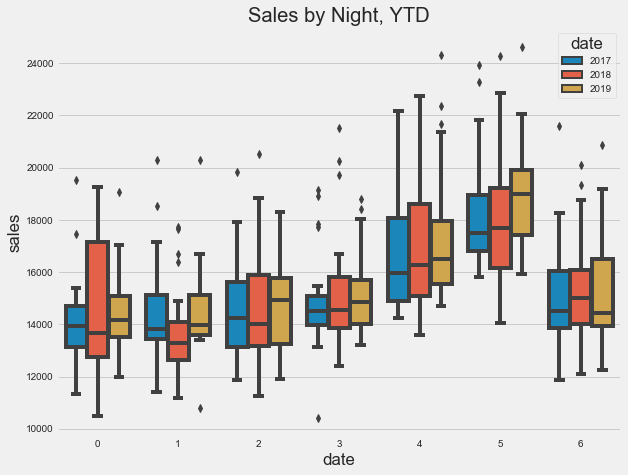

In [307]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,7))
sns.boxplot(x=df_ytd.index.dayofweek,
               y=df_ytd.sales,
               hue=df_ytd.index.year,
               data=df_ytd
                );

plt.title('Sales by Night, YTD');

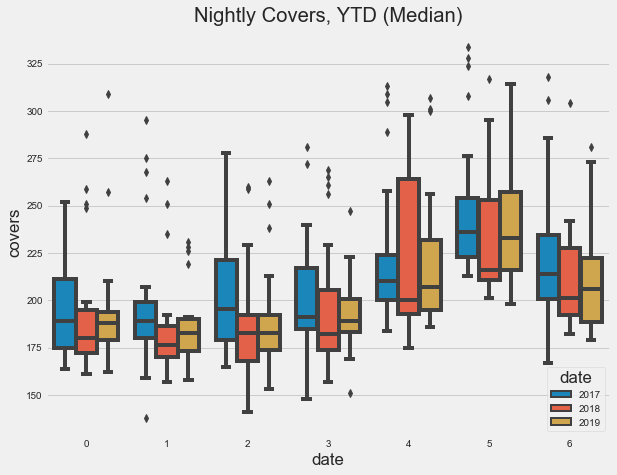

In [308]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,7))
sns.boxplot(x=df_ytd.index.dayofweek,
               y='covers',
               hue=df_ytd.index.year,
               data=df_ytd
                );

plt.title('Nightly Covers, YTD (Median)');

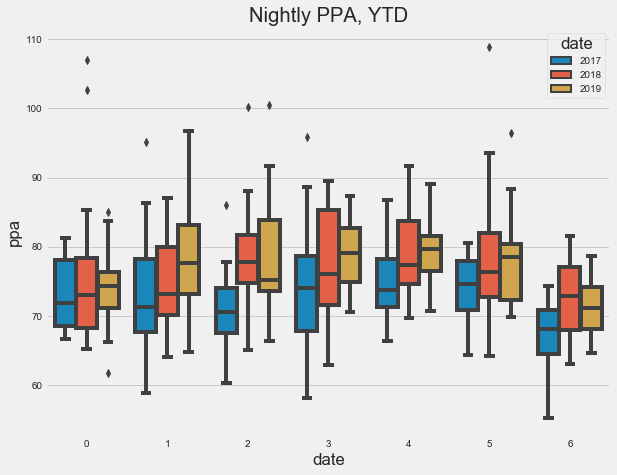

In [309]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,7))
sns.boxplot(x=df_ytd.index.dayofweek,
               y='ppa',
               hue=df_ytd.index.year,
               data=df_ytd
                );

plt.title('Nightly PPA, YTD');

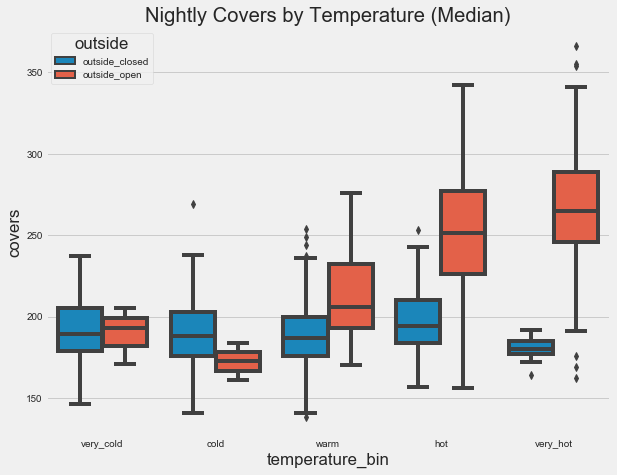

In [310]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,7))
sns.boxplot(x='temperature_bin',
               y='covers',
               hue='outside',
               data=df,
               order=['very_cold', 'cold', 'warm', 'hot', 'very_hot']
                );

plt.title('Nightly Covers by Temperature (Median)');

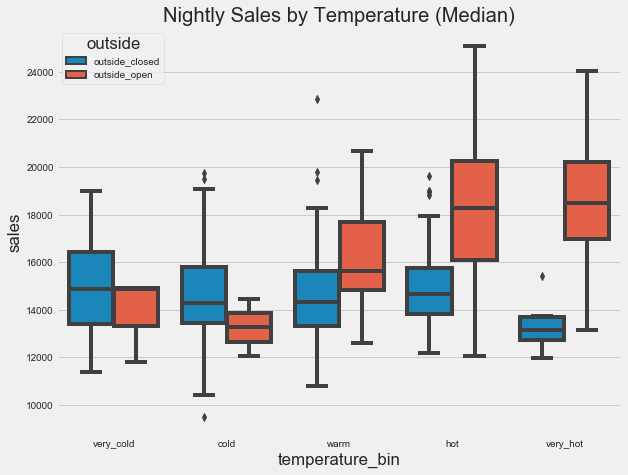

In [311]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,7))
sns.boxplot(x='temperature_bin',
               y='sales',
               hue='outside',
               data=df,
               order=['very_cold', 'cold', 'warm', 'hot', 'very_hot']
                );

plt.title('Nightly Sales by Temperature (Median)');

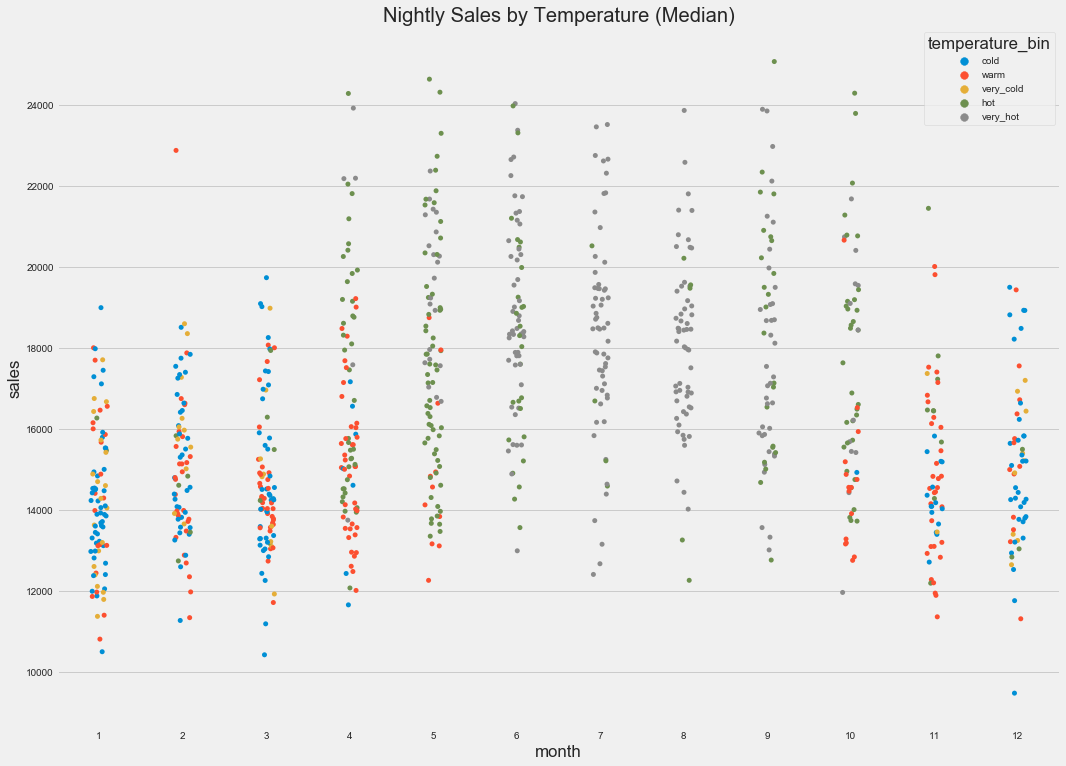

In [312]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,12))
sns.stripplot(x='month',
               y='sales',
               hue='temperature_bin',
               data=df
                );

plt.title('Nightly Sales by Temperature (Median)');

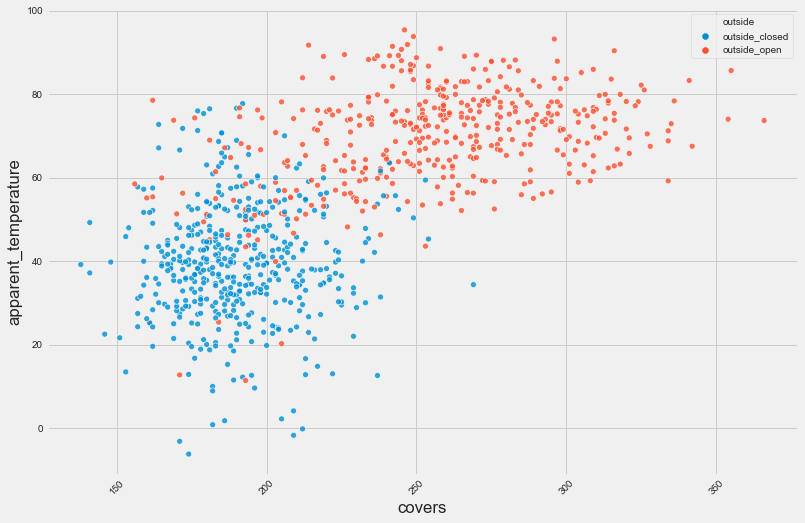

In [313]:
def scatter_plot(col_1, col_2, col_hue, data):
    
    plt.figure(figsize=(12,8))
    sns.scatterplot(x=col_1, y=col_2, hue=col_hue, data=data, alpha=.8)
    plt.xticks(rotation=45)
    plt.show();
    
scatter_plot('covers', 'apparent_temperature', 'outside', df)

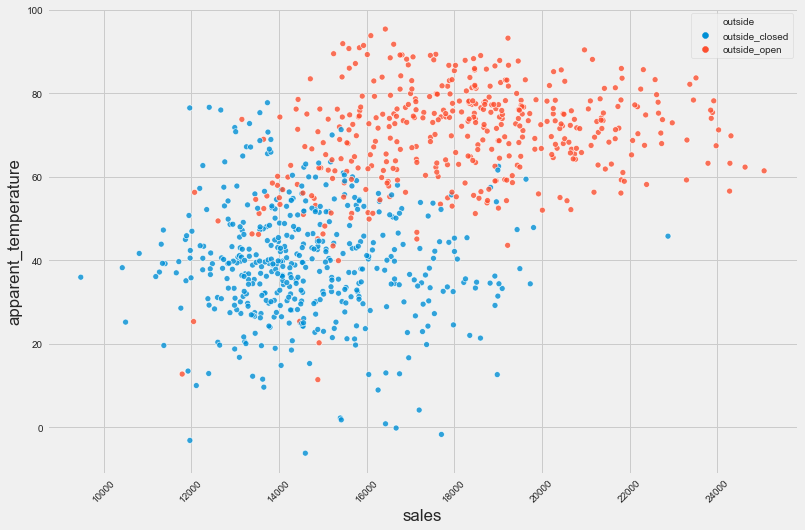

In [314]:
def scatter_plot(col_1, col_2, col_hue, data):
    
    plt.figure(figsize=(12,8))
    sns.scatterplot(x=col_1, y=col_2, hue=col_hue, data=data, alpha=.8)
    plt.xticks(rotation=45)
    plt.show();
    
scatter_plot('sales', 'apparent_temperature', 'outside', df)

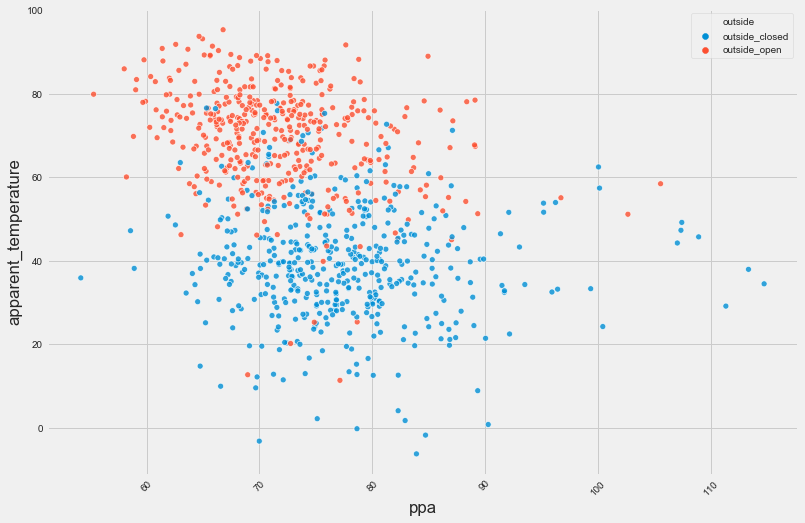

In [315]:
def scatter_plot(col_1, col_2, col_hue, data):
    
    plt.figure(figsize=(12,8))
    sns.scatterplot(x=col_1, y=col_2, hue=col_hue, data=data, alpha=.8)
    plt.xticks(rotation=45)
    plt.show();
    
scatter_plot('ppa', 'apparent_temperature', 'outside', df)

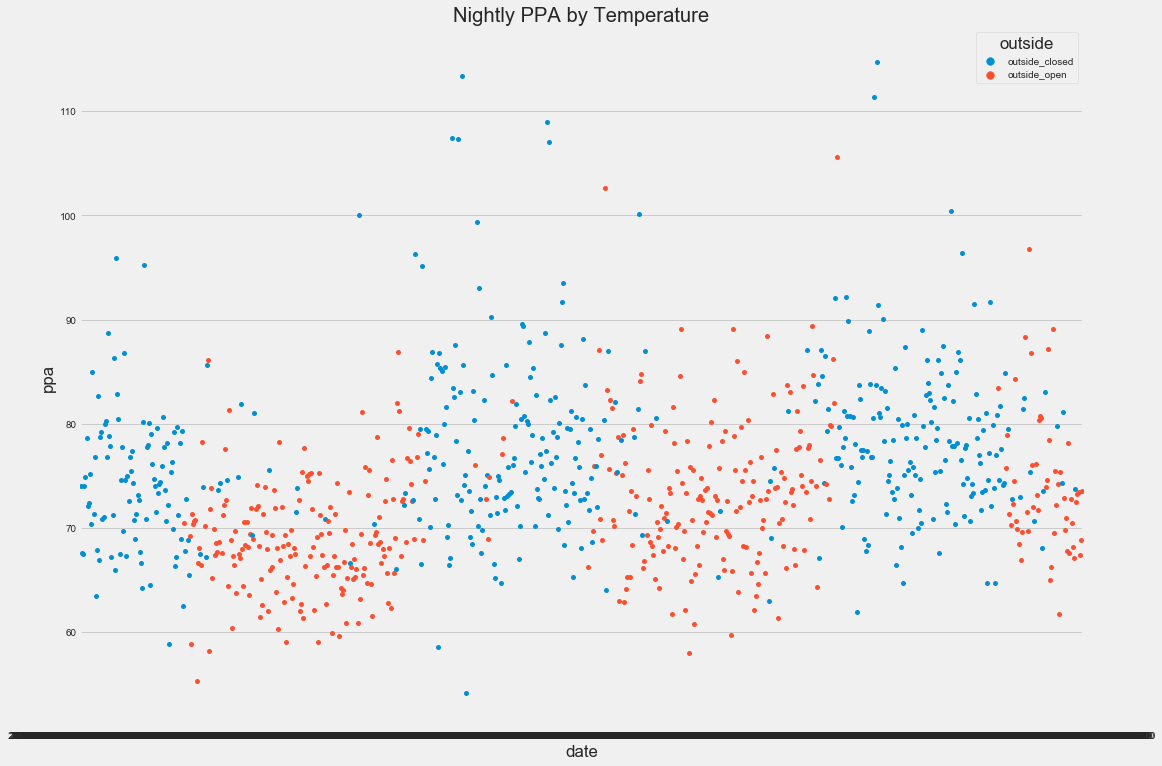

In [316]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,12))
sns.stripplot(x=df.index,
               y='ppa',
               hue='outside',
               data=df
                );

plt.title('Nightly PPA by Temperature');

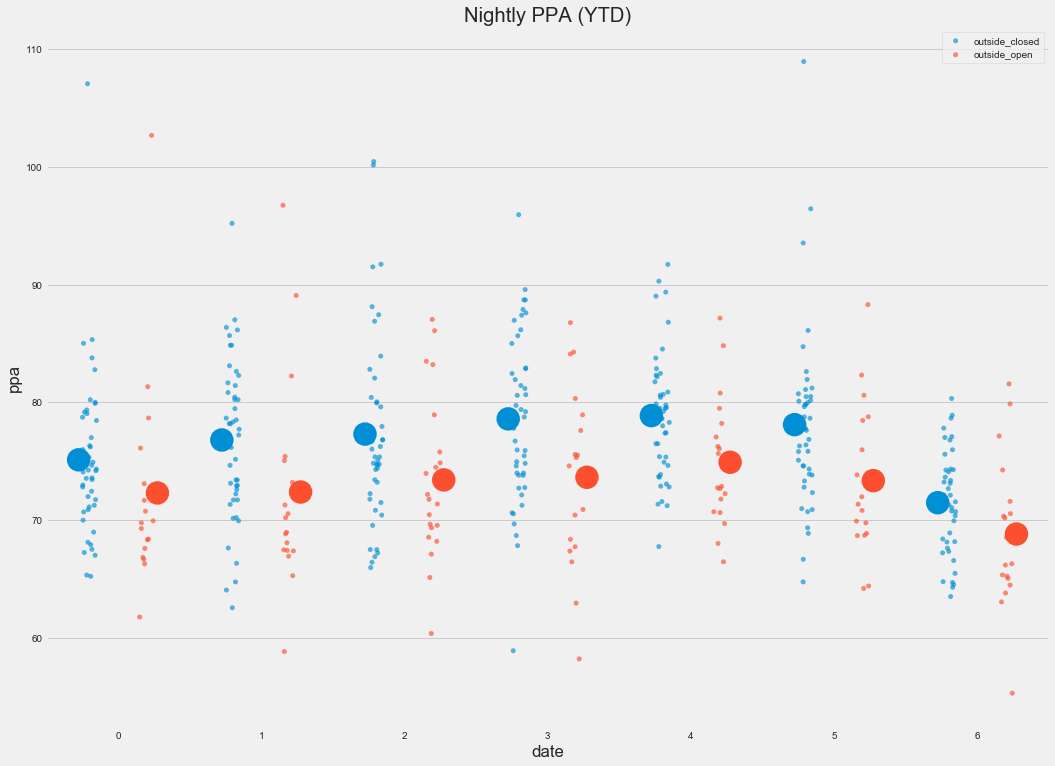

In [317]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,12))
sns.stripplot(x=df_ytd.index.dayofweek,
               y='ppa',
               hue='outside',
               data=df_ytd,
               dodge=0.35,
               alpha=0.65
                );

sns.pointplot(x=df_ytd.index.dayofweek,
               y='ppa',
               hue='outside',
               data=df_ytd,
               dodge=0.55,
               alpha=0.75,
               join=False,
               ci=None
                );


plt.legend(['outside_closed', 'outside_open'])
plt.title('Nightly PPA (YTD)');

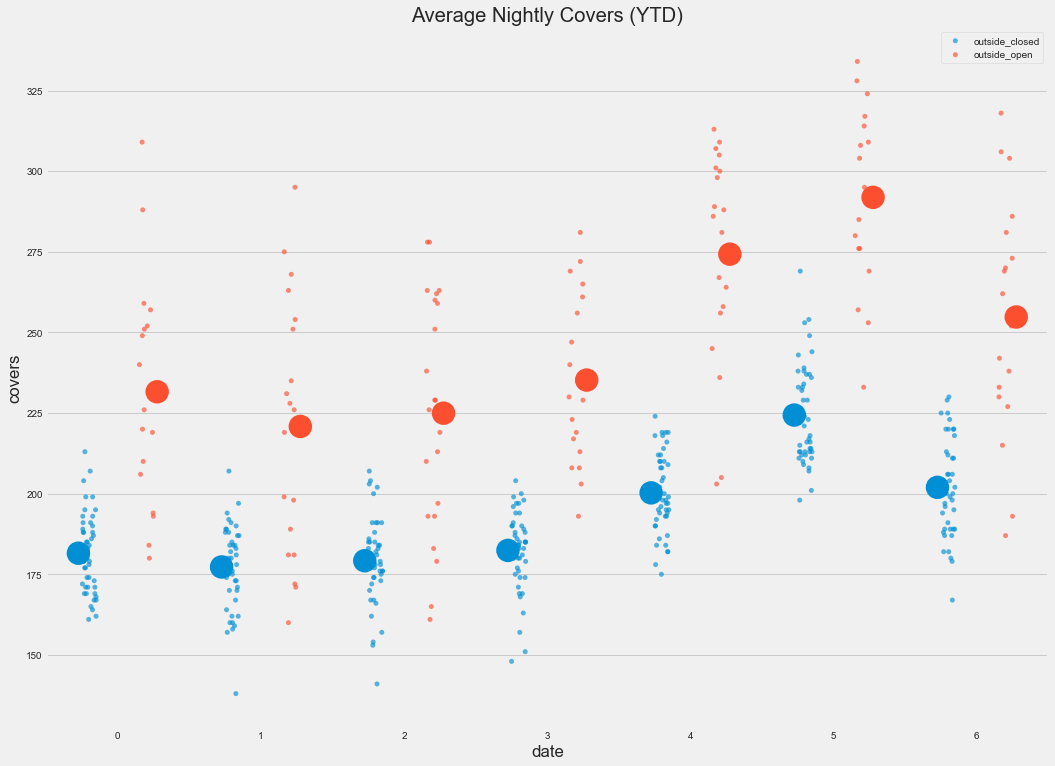

In [318]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,12))
sns.stripplot(x=df_ytd.index.dayofweek,
               y='covers',
               hue='outside',
               data=df_ytd,
               dodge=0.35,
               alpha=0.65
                );

sns.pointplot(x=df_ytd.index.dayofweek,
               y='covers',
               hue='outside',
               data=df_ytd,
               dodge=0.55,
               alpha=0.75,
               join=False,
               ci=None
                );


plt.legend(['outside_closed', 'outside_open'])
plt.title('Average Nightly Covers (YTD)');

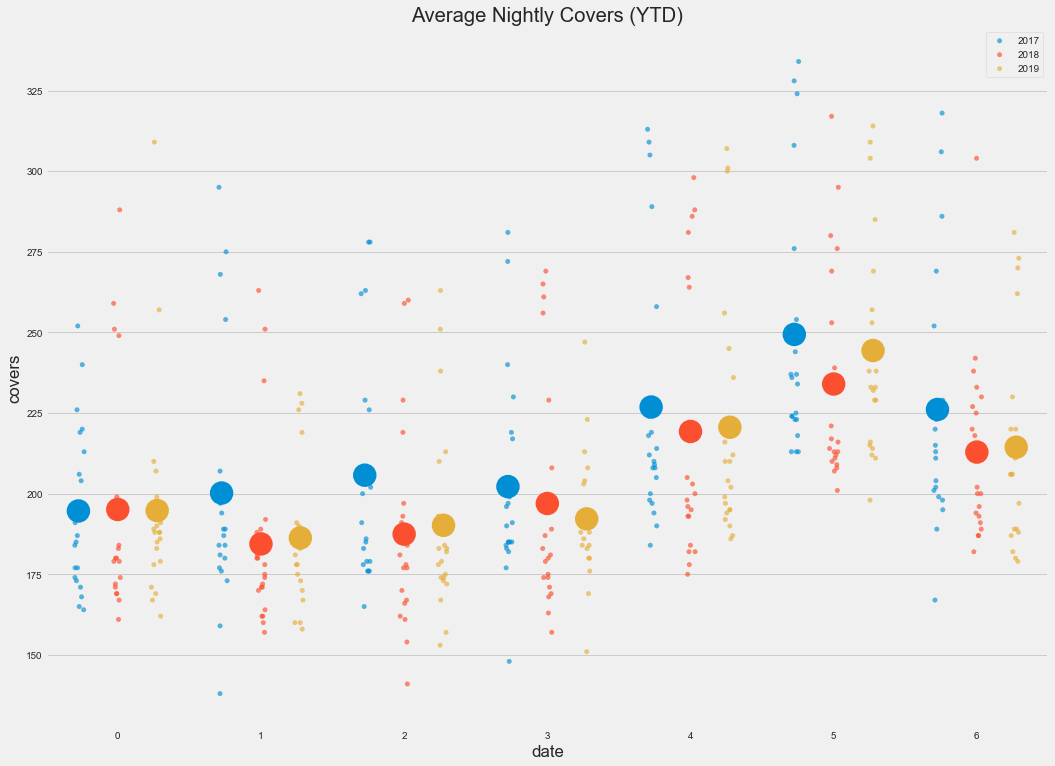

In [319]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,12))
sns.stripplot(x=df_ytd.index.dayofweek,
               y='covers',
               hue=df_ytd.index.year,
               data=df_ytd,
               dodge=0.35,
               alpha=0.65
                );

sns.pointplot(x=df_ytd.index.dayofweek,
               y='covers',
               hue=df_ytd.index.year,
               data=df_ytd,
               dodge=0.55,
               alpha=0.75,
               join=False,
               ci=None
                );


plt.legend(['2017', '2018', '2019'])
plt.title('Average Nightly Covers (YTD)');

In [320]:
import plotly_express as px

## DASH

In [321]:
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output

In [ ]:
app = dash.Dash('Art in the Age of Macine Learning')

text_style = dict(color='#444', fontFamily='sans-serif', fontWeight=300)
plotly_figure = dict(data=[dict(x=[1,2,3], y=[2,4,8])])

app.layout = html.Div([
        html.H2('Lets have some #!@&%', style=text_style),
        html.P('TRACE TYPE GOES HERE', style=text_style),
        dcc.Input(id='text1', placeholder='box', value=''),
        dcc.Graph(id='plot1', figure=plotly_figure),
])

@app.callback(Output('plot1', 'figure'), [Input('text1', 'value')])

def text_callback(text_input):
    return {'data': [dict(x=[1,2,3], y=[2,4,8], type=text_input)]}

app.server.run()

 * Serving Flask app "Art in the Age of Macine Learning" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
INFO:werkzeug:127.0.0.1 - - [18/Jun/2019 13:44:52] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [18/Jun/2019 13:44:53] "GET /_dash-layout HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [18/Jun/2019 13:44:53] "GET /_dash-dependencies HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [18/Jun/2019 13:44:53] "GET /_favicon.ico HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [18/Jun/2019 13:44:53] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [18/Jun/2019 14:02:48] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [18/Jun/2019 14:02:48] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [18/Jun/2019 14:02:48] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [18/Jun/2019 14:02:49] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [18/Jun/2019 14:02:49] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:w